<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability axioms
Axioms:


*   For any event $A$ , $1 \ge P(A) \ge 0$
*   $P(S) = 1$
*   $P(A) = \frac {N(A)} {N}$
*   For mutually exclusive events $A$ and $B$,  $P(A \cup B)=P(A)+P(B)$




In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load mpg dataset
mpg_data = sns.load_dataset('mpg')

# remove rows with missing data
mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower'])
# mpg_data.head()

# all cars in the dataset
sample_space = mpg_data

# cars with mpg > 25
event_A = sample_space[sample_space['mpg'] > 25]

# cars with horsepower < 100
event_B = sample_space[sample_space['horsepower'] < 100]

# probability function for events
def probability(event, sample_space):
    return len(event) / len(sample_space)

P_A = probability(event_A, sample_space)  # cars with mpg > 25
P_B = probability(event_B, sample_space)  # cars with horsepower < 100

# P(S) = 1
P_S = probability(sample_space, sample_space)

# P(A ∪ B)
P_A_or_B = P_A + P_B
# P(A') = 1 - P(A)
P_A_complement = 1 - P_A

print(f"P(A) = {P_A}, 0 <= P(A) <= 1")
print(f"P(Sample Space) = {P_S}")
print(f"P(A ∪ B) = {P_A_or_B}")
print(f"P(A') = {P_A_complement}")

# P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
event_A_and_B = sample_space[(sample_space['mpg'] > 25) & (sample_space['horsepower'] < 100)]
P_A_and_B = probability(event_A_and_B, sample_space)

P_A_union_B = P_A + P_B - P_A_and_B
print(f"P(A ∪ B) = {P_A_union_B}")


P(A) = 0.3979591836734694, 0 <= P(A) <= 1
P(Sample Space) = 1.0
P(A ∪ B) = 0.9719387755102041
P(A') = 0.6020408163265306
P(A ∪ B) = 0.5943877551020409


## Conditional probability
**Conditional probability** is  the likelihood of an event or outcome
occurring, based on the occurrence of a previous event or outcome.

The **conditional probability** $P(A|B)$ is calculated using the formula:
$P(A|B)=\frac{P(A\cap B)}{P(B)}$

In [24]:
# cars with mpg > 25 and horsepower < 100
event_A_and_B = mpg_data[(mpg_data['mpg'] > 25) & (mpg_data['horsepower'] < 100)]

#calculate unconditional probabilities
P_A = probability(event_A, sample_space)
P_B = probability(event_B, sample_space)
P_A_and_B = probability(event_A_and_B, sample_space)

#calculate conditional probability P(A | B)
if P_B > 0:
    P_A_given_B = P_A_and_B / P_B
else:
    P_A_given_B = 0


print(f"Unconditional Probability P(A): {P_A:.3f}")
print(f"Unconditional Probability P(B): {P_B:.3f}")
print(f"Joint Probability P(A ∩ B): {P_A_and_B:.3f}")
print(f"Conditional Probability P(A | B): {P_A_given_B:.3f}")

# check for independence: P(A ∩ B) = P(A) * P(B)
independent = P_A_and_B == P_A * P_B
print(f"Are A and B independent? {independent}")


Unconditional Probability P(A): 0.398
Unconditional Probability P(B): 0.574
Joint Probability P(A ∩ B): 0.378
Conditional Probability P(A | B): 0.658
Are A and B independent? False


## Discrete Random Variables
* **Probability Mass Function (pmf)**: This gives the probability that a discrete random variable is exactly equal to some value.
* **Cumulative Distribution Function (cdf)**: This gives the probability that a random variable is less than or equal to a certain value.
* **Expected Value**: The mean of a discrete random variable, representing the long run average value.
* **Variance**: A measure of the spread of the random variable around its mean.

### Bernoulli Random Variable
The **Bernoulli random variable** $X$ can take only two possible values, 0 or 1, where:

*   $P(X=1)=p$
*   $P(X=0)=1-p$



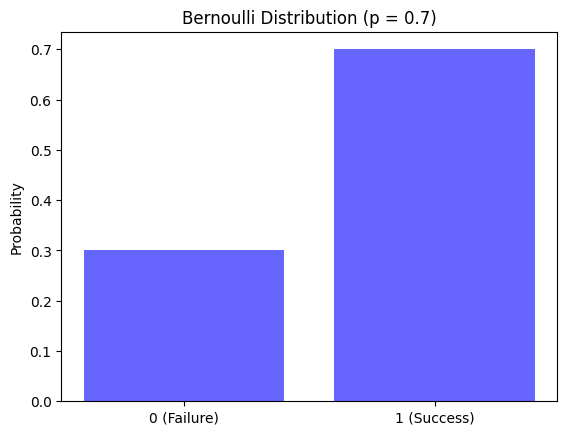

PMF of Bernoulli RV: P(0) = 0.30, P(1) = 0.70
CDF of Bernoulli RV: P(X <= 0) = 0.30, P(X <= 1) = 1.00
Expected Value E(X) = 0.70
Variance Var(X) = 0.21


In [25]:
# bernoulli distribution parameters
p = 0.7  # Probability of success
n_trials = 1000  # Number of trials

# simulating Bernoulli random variable
bernoulli_rv = np.random.binomial(1, p, size=n_trials)

#probability mass function (pmf)
pmf_bernoulli = [1 - p, p]

# plotting the pmf of the Bernoulli distribution
plt.bar([0, 1], pmf_bernoulli, color='blue', alpha=0.6)
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.title(f'Bernoulli Distribution (p = {p})')
plt.ylabel('Probability')
plt.show()

#cumulative distribution function (cdf)
cdf_bernoulli = np.cumsum(pmf_bernoulli)

print(f"PMF of Bernoulli RV: P(0) = {pmf_bernoulli[0]:.2f}, P(1) = {pmf_bernoulli[1]:.2f}")
print(f"CDF of Bernoulli RV: P(X <= 0) = {cdf_bernoulli[0]:.2f}, P(X <= 1) = {cdf_bernoulli[1]:.2f}")

#expected value and variance
expected_value = p
variance = p * (1 - p)

print(f"Expected Value E(X) = {expected_value:.2f}")
print(f"Variance Var(X) = {variance:.2f}")


### Poisson Distribution
A **Poisson random variable** describes the number of events that occur in a fixed interval of time or space. It is characterized by a parameter
$\mu$, which is the expected number of events in the interval.

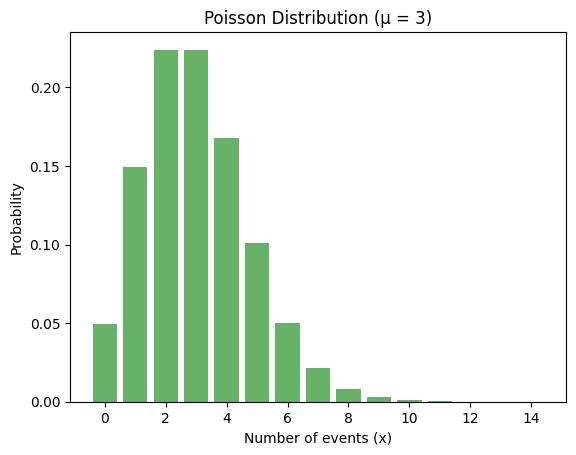

PMF of Poisson RV: [4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06]
CDF of Poisson RV: [0.04978707 0.19914827 0.42319008 0.64723189 0.81526324 0.91608206
 0.96649146 0.9880955  0.99619701 0.99889751 0.99970766 0.99992861
 0.99998385 0.9999966  0.99999933]
Expected Value E(X) = 3.00
Variance Var(X) = 3.00


In [26]:
from scipy.stats import poisson

# poisson distribution parameter
mu = 3  # average number of events

# simulating Poisson random variable
x_values = np.arange(0, 15)  # Range of x values to plot
poisson_pmf = poisson.pmf(x_values, mu)  # Probability mass function

# plotting the pmf of the Poisson distribution
plt.bar(x_values, poisson_pmf, color='green', alpha=0.6)
plt.title(f'Poisson Distribution (μ = {mu})')
plt.xlabel('Number of events (x)')
plt.ylabel('Probability')
plt.show()

# Cumulative distribution function (cdf)
poisson_cdf = poisson.cdf(x_values, mu)

print(f"PMF of Poisson RV: {poisson_pmf}")
print(f"CDF of Poisson RV: {poisson_cdf}")

# Expected value and variance
expected_value_poisson = mu
variance_poisson = mu

print(f"Expected Value E(X) = {expected_value_poisson:.2f}")
print(f"Variance Var(X) = {variance_poisson:.2f}")


## Continuous Random Variables
A **continuous random variable** takes on values in a continuous range. This range could either be an interval or a union of disjoint intervals.

#### Probability Density Function (pdf)
For a **continuous random variable** $X$, the probability of $X$ falling within an interval
$[a,b]$ is given by the probability density function $f(x)$ as:
$ P(a\le X\le b) = \int_{a}^{b}f(x) dx$

The pdf satisfies two conditions:


1.   $f(x) \ge 0$ for all $x$
2.   total area under the pdf curve is 1: $\int_{-\infty }^{\infty }f(x)dx=1$

#### Expected Value and Variance of Continuous Random Variables:

The expected value $\mu_X$ and variance ${\sigma^2}_X$ are defined similarly to those for discrete random variables, but with integrals:


*   **Expected Value**: $\mu_X =E(X)=\int_{-\infty }^{\infty }x\cdot f(x)dx$
*   **Variance**: ${\sigma^2}_X=V(X)=\int_{-\infty }^{\infty }(x-\mu)^2\cdot f(x)dx=E((x-\mu)^2)$



### Exponential Distribution
An **exponential distribution** is used to model the time between events in a Poisson process. The pdf of an exponentially distributed random variable $X$ with parameter $λ>0$ is:

$f(x) = \cases{        \lambda e^{- \lambda x},       & $x\ge 0$ \cr
                 0, & otherwise \cr
                         }
$



*   **Expected value**: $E(X)= \frac {1} {λ}$
*   **Variance**: $V(X)= \frac {1} {λ^2}$

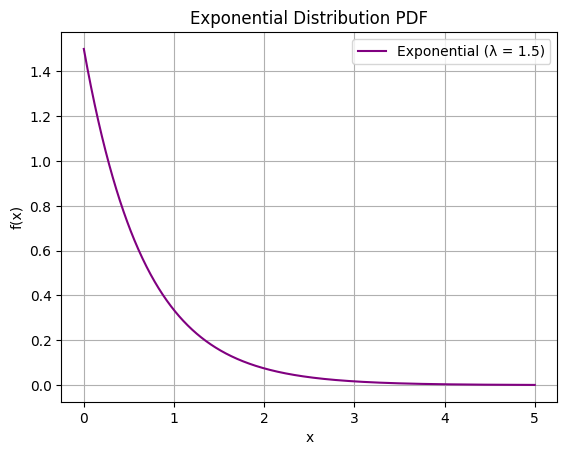

Expected Value (E[X]): 0.67
Variance (Var[X]): 0.44


In [27]:
from scipy.stats import expon

# parameters for exponential distribution
lambda_param = 1.5

# generate x values
x_values = np.linspace(0, 5, 1000)

#probability density function
pdf_exponential = expon.pdf(x_values, scale=1/lambda_param)

#plotting exponential distribution
plt.plot(x_values, pdf_exponential, label=f'Exponential (λ = {lambda_param})', color='purple')
plt.title('Exponential Distribution PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# expected value and variance
expected_value_exp = 1 / lambda_param
variance_exp = 1 / (lambda_param ** 2)

print(f"Expected Value (E[X]): {expected_value_exp:.2f}")
print(f"Variance (Var[X]): {variance_exp:.2f}")


### Normal Distribution
The **normal distribution** is one of the most important continuous probability distributions. A random variable
$X$ is said to have a normal distribution with mean $\mu$ and standard deviation $\sigma$, denoted $X\sim N(\mu,\sigma^2)$, if its pdf is: $f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{- \frac{(x- \mu)^2}{2 \sigma ^2}}, -\infty \lt x\lt \infty $


*   mean $\mu$ determines the center of the distribution.
*   standard deviation $\sigma$ controls the spread.
*   The standard normal distribution has $\mu = 0$ and $\sigma = 1$



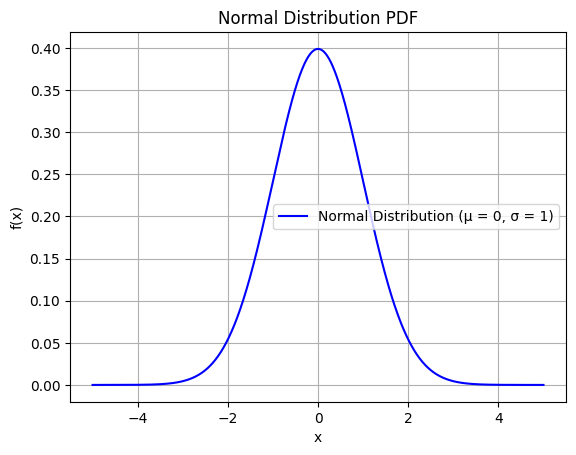

Expected Value (E[X]): 0.00
Variance (Var[X]): 1.00


In [28]:
from scipy.stats import norm

# parameters for normal distribution
mu = 0   # Mean
sigma = 1  # Standard deviation

# generate x values
x_values = np.linspace(-5, 5, 1000)

# probability density function
pdf_normal = norm.pdf(x_values, mu, sigma)

# plotting the normal distribution
plt.plot(x_values, pdf_normal, label=f'Normal Distribution (μ = {mu}, σ = {sigma})', color='blue')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# expected value and variance
expected_value_norm = mu
variance_norm = sigma ** 2

print(f"Expected Value (E[X]): {expected_value_norm:.2f}")
print(f"Variance (Var[X]): {variance_norm:.2f}")
